# Power Consumpation Prediction

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
df = pd.read_excel('/content/data.xlsx')

In [73]:
df.head()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Day,Month,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,6.559,73.8,0.083,0.051,0.119,1,1,34055.69620,16128.87538,20240.96386
1,6.414,74.5,0.083,0.070,0.085,1,1,29814.68354,19375.07599,20131.08434
2,6.313,74.5,0.080,0.062,0.100,1,1,29128.10127,19006.68693,19668.43373
3,6.121,75.0,0.083,0.091,0.096,1,1,28228.86076,18361.09422,18899.27711
4,5.921,75.7,0.081,0.048,0.085,1,1,27335.69620,17872.34043,18442.40964


#EDA

<ipython-input-74-e54616218bf6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Month']) # day 1-30, 1-12


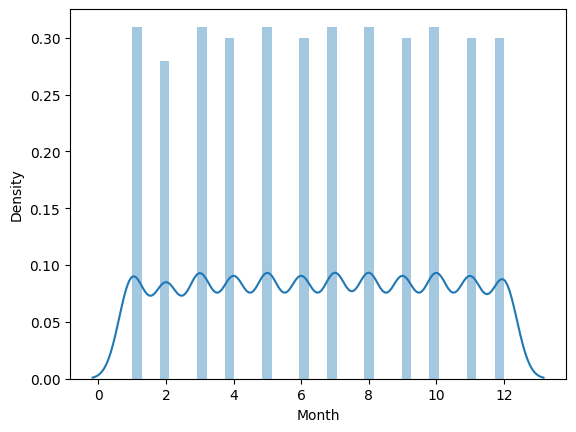

In [74]:
sns.distplot(df['Month']) # day 1-30, 1-12
plt.show()

In [75]:
df.isnull().sum()

,0
Temperature,0
Humidity,0
WindSpeed,0
GeneralDiffuseFlows,0
DiffuseFlows,0
Day,0
Month,0
PowerConsumption_Zone1,0
PowerConsumption_Zone2,0
PowerConsumption_Zone3,0


<ipython-input-76-c4618dd5a708>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature'])


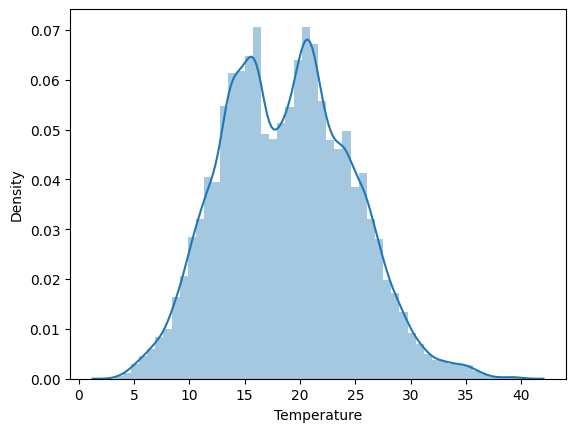

In [76]:
sns.distplot(df['Temperature'])
plt.show()

<ipython-input-77-36d08ec3f812>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Humidity'])


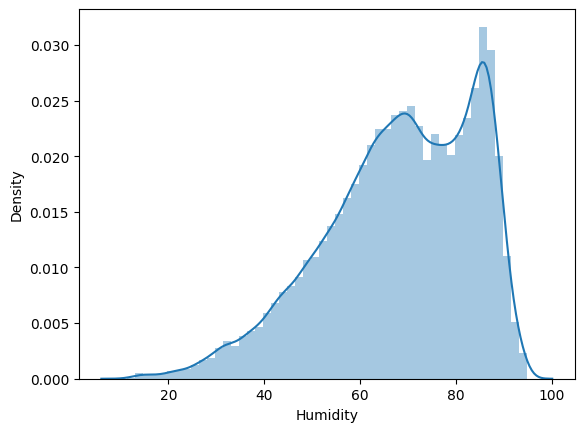

In [77]:
sns.distplot(df['Humidity'])
plt.show()

<ipython-input-78-242b91a7ffd3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['WindSpeed'])


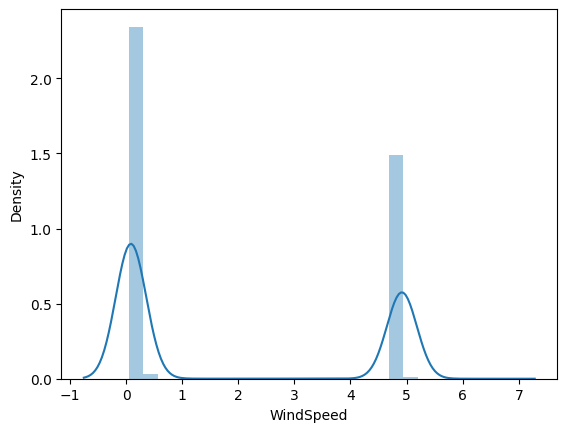

In [78]:
sns.distplot(df['WindSpeed'])
plt.show()

<ipython-input-79-b9b9538ddfdb>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GeneralDiffuseFlows'])


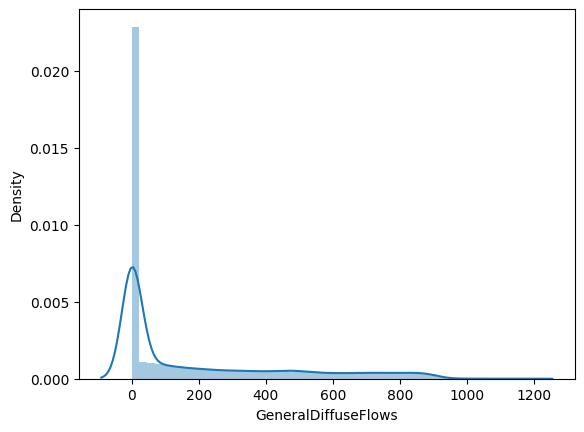

In [79]:
sns.distplot(df['GeneralDiffuseFlows'])
plt.show()
#outlier and normalize

<ipython-input-80-8466dfa80db1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DiffuseFlows'])


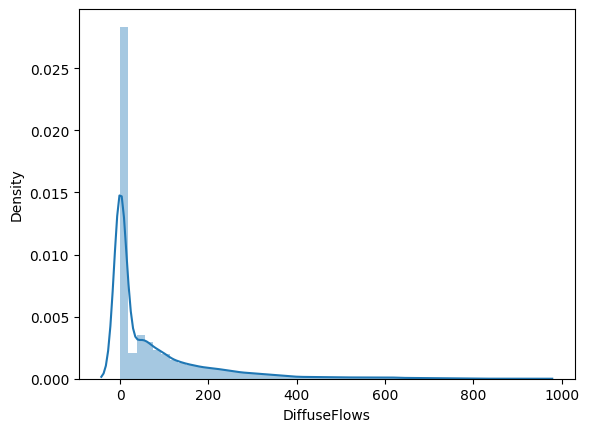

In [80]:
sns.distplot(df['DiffuseFlows'])
plt.show()
#outlier and normalize

**outliersdetection & removing:**

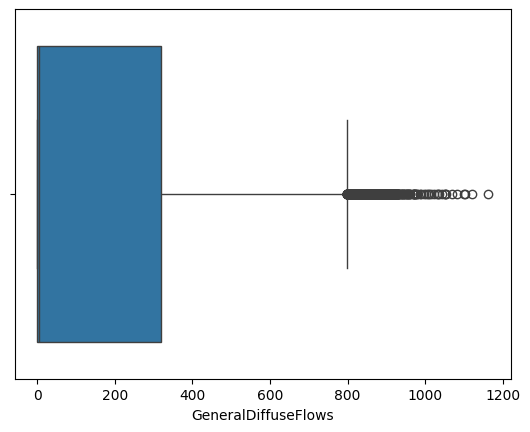

In [81]:
sns.boxplot(x='GeneralDiffuseFlows',data=df)
plt.show()

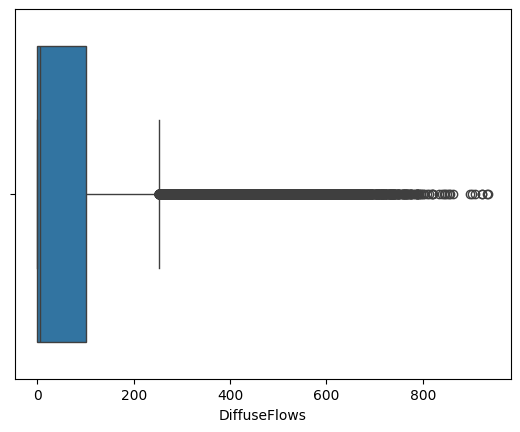

In [82]:
sns.boxplot(x='DiffuseFlows',data=df)
plt.show()

#Outliers:

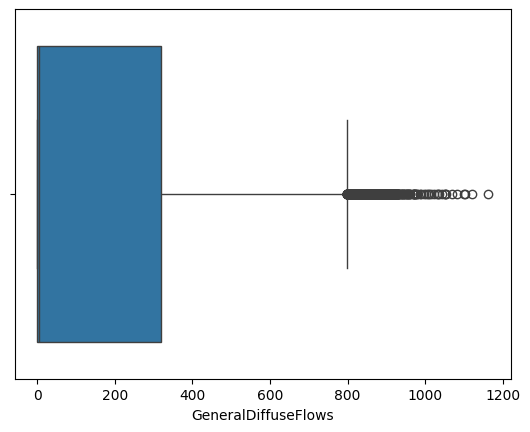

In [92]:
sns.boxplot(x='GeneralDiffuseFlows',data=df)
plt.show()

In [93]:
#z-score:
q1 = df['GeneralDiffuseFlows'].quantile(0.25)
q3 = df['GeneralDiffuseFlows'].quantile(0.75)
iqr = q3-q1
print(iqr)
upper_fence = q3+1.5*iqr
lower_fence = q1-1.5*iqr
print(upper_fence)
print(lower_fence)

319.538
798.907
-479.245


In [94]:
df['GeneralDiffuseFlows'] = df['GeneralDiffuseFlows'][df['GeneralDiffuseFlows']<=upper_fence]

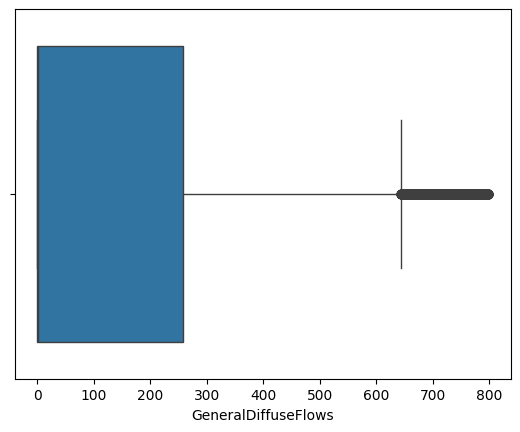

In [95]:
sns.boxplot(x='GeneralDiffuseFlows',data=df)
plt.show()

**outlier for diffuseflows**

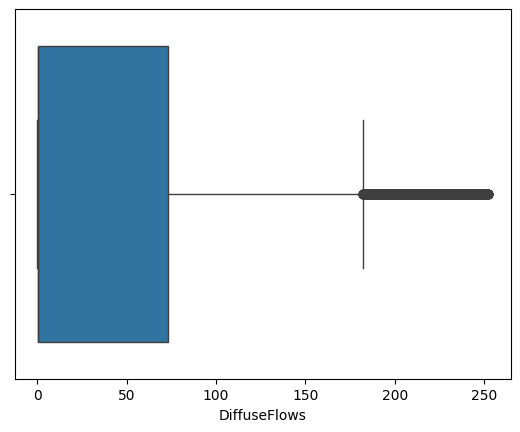

In [96]:
sns.boxplot(x='DiffuseFlows',data=df)
plt.show()

In [97]:
q13 = df['DiffuseFlows'].quantile(0.25)
q33 = df['DiffuseFlows'].quantile(0.75)
iqr2 = q33-q13
print(iqr2)
upper_fence2 = q33+1.5*iqr2
lower_fence2 = q13-1.5*iqr2
print(upper_fence2)
print(lower_fence2)

72.781
182.07150000000001
-109.05250000000001


In [98]:
# Instead of assigning the filtered DataFrame, assign the filtered column values
df['DiffuseFlows'] = df['DiffuseFlows'][df['DiffuseFlows']<=upper_fence2]

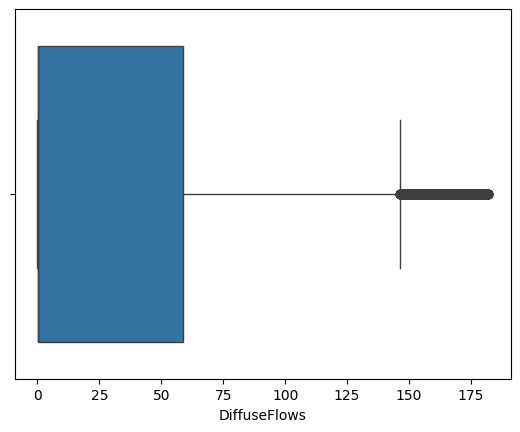

In [99]:
sns.boxplot(x='DiffuseFlows',data=df)
plt.show()

#Normalization

In [100]:
df.describe()

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Day,Month,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
count,52416.000000,52416.000000,52416.000000,50101.000000,44922.000000,52416.000000,52416.000000,52416.000000,52416.000000,52416.000000
mean,18.810024,68.259518,1.959489,151.545712,32.889751,15.678571,6.510989,32344.970564,21042.509082,17835.406218
std,5.815476,15.551177,2.348862,226.040901,48.663873,8.771822,3.440642,7130.562564,5201.465892,6622.165099
min,3.247000,11.340000,0.050000,0.004000,0.011000,1.000000,1.000000,13895.696200,8560.081466,5935.174070
25%,14.410000,58.310000,0.078000,0.062000,0.115000,8.000000,4.000000,26310.668692,16980.766032,13129.326630
50%,18.780000,69.860000,0.086000,0.871000,0.167000,16.000000,7.000000,32265.920340,20823.168405,16415.117470
75%,22.890000,81.400000,4.915000,257.400000,58.657500,23.000000,9.250000,37309.018185,24713.717520,21624.100420
max,40.010000,94.800000,6.483000,798.000000,182.000000,31.000000,12.000000,52204.395120,37408.860760,47598.326360


<ipython-input-101-60d2e10a2e27>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GeneralDiffuseFlows'])


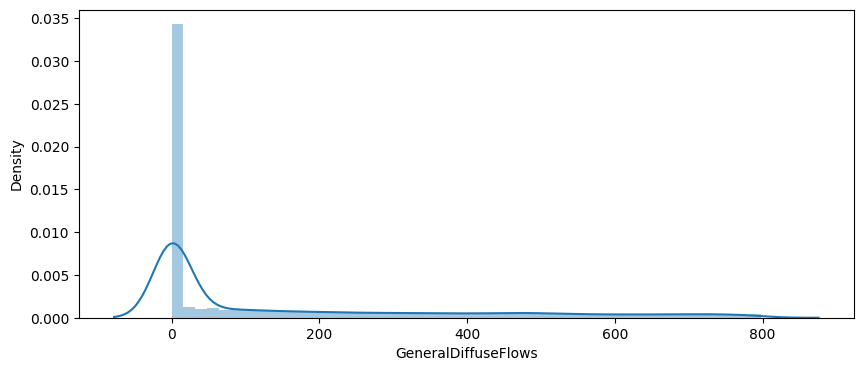

In [101]:
plt.figure(figsize=(10,4))
sns.distplot(df['GeneralDiffuseFlows'])
plt.show()

<ipython-input-102-2be3d39925f1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DiffuseFlows'])


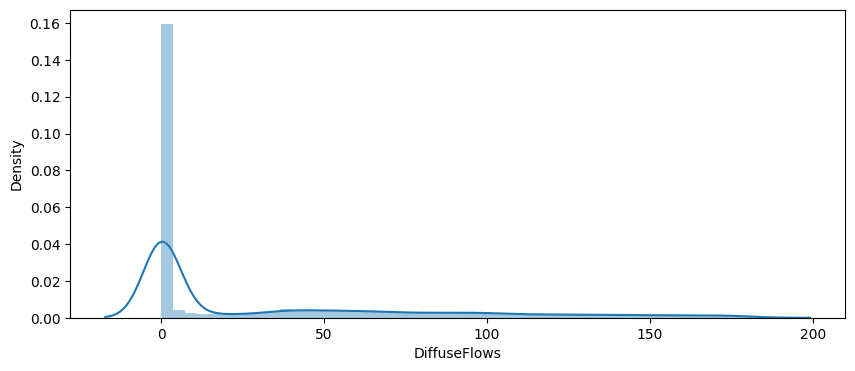

In [102]:
plt.figure(figsize=(10,4))
sns.distplot(df['DiffuseFlows'])
plt.show()

In [103]:
from sklearn.preprocessing import MinMaxScaler

**column1**

In [109]:
mns1 = MinMaxScaler()
mns1.fit(df[['Temperature']])

MinMaxScaler()

In [110]:
df['Temperature']=mns1.transform(df[['Temperature']])

<ipython-input-111-d6601de4365d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature'])


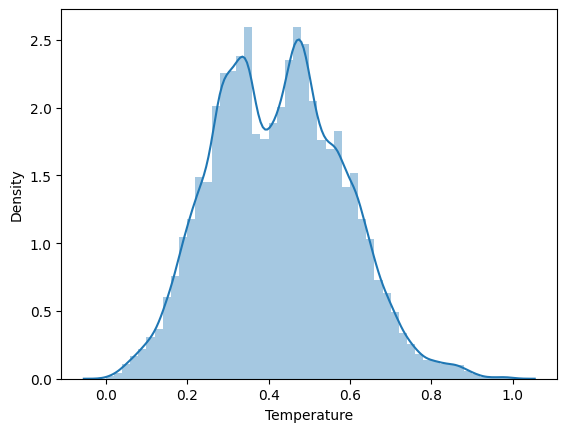

In [111]:
sns.distplot(df['Temperature'])
plt.show()
#temperature normalize

**column2**

In [112]:
mns2 = MinMaxScaler()
mns2.fit(df[['Humidity']])
df['Humidity']=mns2.transform(df[['Humidity']])
df
#temperature normalize

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Day,Month,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,0.090091,0.748382,0.083,0.051,0.119,1,1,34055.69620,16128.87538,20240.96386
1,0.086146,0.756770,0.083,0.070,0.085,1,1,29814.68354,19375.07599,20131.08434
2,0.083399,0.756770,0.080,0.062,0.100,1,1,29128.10127,19006.68693,19668.43373
3,0.078176,0.762761,0.083,0.091,0.096,1,1,28228.86076,18361.09422,18899.27711
4,0.072736,0.771148,0.081,0.048,0.085,1,1,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...,...
52411,0.102358,0.731608,0.080,0.040,0.096,30,12,31160.45627,26857.31820,14780.31212
52412,0.100645,0.734004,0.082,0.051,0.093,30,12,30430.41825,26124.57809,14428.81152
52413,0.099366,0.736401,0.086,0.084,0.074,30,12,29590.87452,25277.69254,13806.48259
52414,0.095504,0.738797,0.080,0.066,0.089,30,12,28958.17490,24692.23688,13512.60504


<ipython-input-113-36d08ec3f812>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Humidity'])


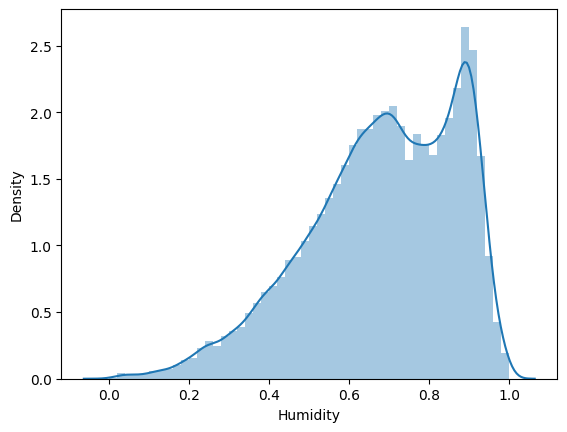

In [113]:
sns.distplot(df['Humidity'])
plt.show()

**column3**

In [114]:
mns3 = MinMaxScaler()
mns3.fit(df[['WindSpeed']])
df['WindSpeed']=mns3.transform(df[['WindSpeed']])
df
#temperature normalize

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Day,Month,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,0.090091,0.748382,0.005130,0.051,0.119,1,1,34055.69620,16128.87538,20240.96386
1,0.086146,0.756770,0.005130,0.070,0.085,1,1,29814.68354,19375.07599,20131.08434
2,0.083399,0.756770,0.004663,0.062,0.100,1,1,29128.10127,19006.68693,19668.43373
3,0.078176,0.762761,0.005130,0.091,0.096,1,1,28228.86076,18361.09422,18899.27711
4,0.072736,0.771148,0.004819,0.048,0.085,1,1,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...,...
52411,0.102358,0.731608,0.004663,0.040,0.096,30,12,31160.45627,26857.31820,14780.31212
52412,0.100645,0.734004,0.004974,0.051,0.093,30,12,30430.41825,26124.57809,14428.81152
52413,0.099366,0.736401,0.005596,0.084,0.074,30,12,29590.87452,25277.69254,13806.48259
52414,0.095504,0.738797,0.004663,0.066,0.089,30,12,28958.17490,24692.23688,13512.60504


<ipython-input-115-242b91a7ffd3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['WindSpeed'])


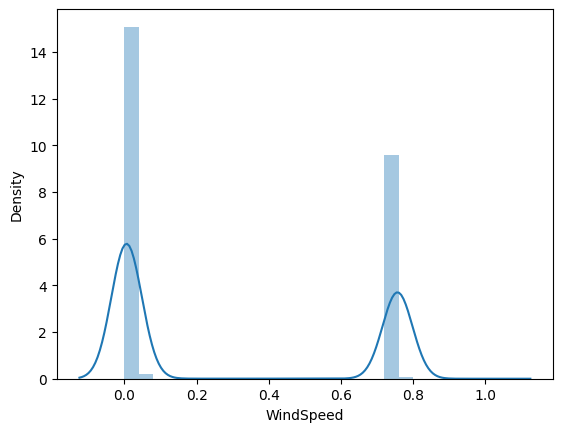

In [115]:
sns.distplot(df['WindSpeed'])
plt.show()

**column4**

In [116]:
mns4 = MinMaxScaler()
mns4.fit(df[['GeneralDiffuseFlows']])
df['GeneralDiffuseFlows']=mns4.transform(df[['GeneralDiffuseFlows']])
df
#temperature normalize

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Day,Month,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,0.090091,0.748382,0.005130,0.000059,0.119,1,1,34055.69620,16128.87538,20240.96386
1,0.086146,0.756770,0.005130,0.000083,0.085,1,1,29814.68354,19375.07599,20131.08434
2,0.083399,0.756770,0.004663,0.000073,0.100,1,1,29128.10127,19006.68693,19668.43373
3,0.078176,0.762761,0.005130,0.000109,0.096,1,1,28228.86076,18361.09422,18899.27711
4,0.072736,0.771148,0.004819,0.000055,0.085,1,1,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...,...
52411,0.102358,0.731608,0.004663,0.000045,0.096,30,12,31160.45627,26857.31820,14780.31212
52412,0.100645,0.734004,0.004974,0.000059,0.093,30,12,30430.41825,26124.57809,14428.81152
52413,0.099366,0.736401,0.005596,0.000100,0.074,30,12,29590.87452,25277.69254,13806.48259
52414,0.095504,0.738797,0.004663,0.000078,0.089,30,12,28958.17490,24692.23688,13512.60504


<ipython-input-117-a5d2ed9ce0a5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GeneralDiffuseFlows'])


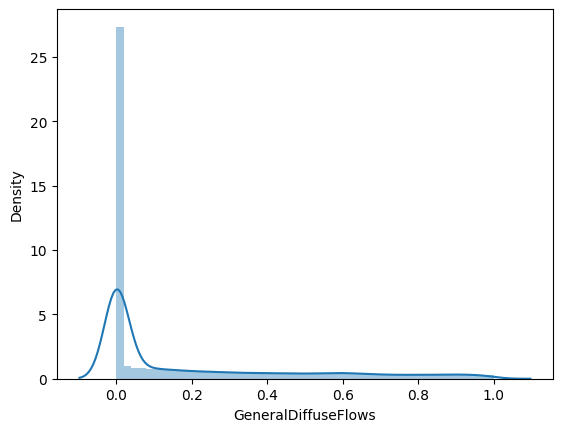

In [117]:
sns.distplot(df['GeneralDiffuseFlows'])
plt.show()

**column 5:**

In [118]:
mns5 = MinMaxScaler()
mns5.fit(df[['DiffuseFlows']])
df['DiffuseFlows']=mns5.transform(df[['DiffuseFlows']])
df
#temperature normalize

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Day,Month,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,0.090091,0.748382,0.005130,0.000059,0.000593,1,1,34055.69620,16128.87538,20240.96386
1,0.086146,0.756770,0.005130,0.000083,0.000407,1,1,29814.68354,19375.07599,20131.08434
2,0.083399,0.756770,0.004663,0.000073,0.000489,1,1,29128.10127,19006.68693,19668.43373
3,0.078176,0.762761,0.005130,0.000109,0.000467,1,1,28228.86076,18361.09422,18899.27711
4,0.072736,0.771148,0.004819,0.000055,0.000407,1,1,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...,...
52411,0.102358,0.731608,0.004663,0.000045,0.000467,30,12,31160.45627,26857.31820,14780.31212
52412,0.100645,0.734004,0.004974,0.000059,0.000451,30,12,30430.41825,26124.57809,14428.81152
52413,0.099366,0.736401,0.005596,0.000100,0.000346,30,12,29590.87452,25277.69254,13806.48259
52414,0.095504,0.738797,0.004663,0.000078,0.000429,30,12,28958.17490,24692.23688,13512.60504


<ipython-input-119-dbc9dc817bbf>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DiffuseFlows'])


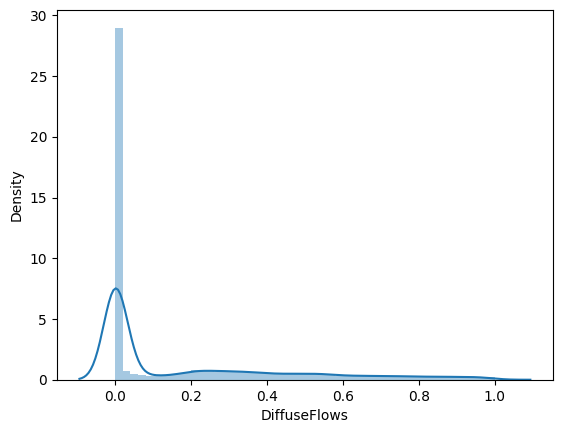

In [119]:
sns.distplot(df['DiffuseFlows'])
plt.show()

# model Building:

In [193]:
x=df.iloc[:,:-3]
y=df[['PowerConsumption_Zone1',	'PowerConsumption_Zone2',	'PowerConsumption_Zone3']]

In [194]:
from sklearn.model_selection import train_test_split

In [195]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size =0.2,random_state =41)

In [196]:
from sklearn.linear_model import LinearRegression

In [197]:
# ... (Your existing code for data loading, preprocessing, etc.) ...

# Create an imputer to replace NaN with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on your training data and transform both train and test data
x_train = imputer.fit_transform(x_train)
x_test = imputer.transform(x_test)

# Now, you can proceed with model training
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [198]:
lr1 =LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [199]:
lr1.score(x_train,y_train)*100,lr1.score(x_test,y_test)*100

(30.617793522905462, 30.920103410942595)

In [179]:
df

,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,Day,Month,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,0.090091,0.748382,0.005130,0.000059,0.000593,1,1,34055.69620,16128.87538,20240.96386
1,0.086146,0.756770,0.005130,0.000083,0.000407,1,1,29814.68354,19375.07599,20131.08434
2,0.083399,0.756770,0.004663,0.000073,0.000489,1,1,29128.10127,19006.68693,19668.43373
3,0.078176,0.762761,0.005130,0.000109,0.000467,1,1,28228.86076,18361.09422,18899.27711
4,0.072736,0.771148,0.004819,0.000055,0.000407,1,1,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...,...
52411,0.102358,0.731608,0.004663,0.000045,0.000467,30,12,31160.45627,26857.31820,14780.31212
52412,0.100645,0.734004,0.004974,0.000059,0.000451,30,12,30430.41825,26124.57809,14428.81152
52413,0.099366,0.736401,0.005596,0.000100,0.000346,30,12,29590.87452,25277.69254,13806.48259
52414,0.095504,0.738797,0.004663,0.000078,0.000429,30,12,28958.17490,24692.23688,13512.60504


In [202]:
pred_dat = [[0.086146,	0.756770,	0.005130,	0.000083,	0.000407,	1,	1]]
lr.predict(pred_dat)


array([[26653.30639059, 15571.85579789, 14237.88089338]])

#pkl file:

In [208]:
#get the file:
import joblib
model = lr
joblib.dump(model,'predict.pkl')

['predict.pkl']

In [209]:
from google.colab import files
files.download('predict.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [207]:
df.columns

Index(['Temperature', 'Humidity', 'WindSpeed', 'GeneralDiffuseFlows',
       'DiffuseFlows', 'Day', 'Month', 'PowerConsumption_Zone1',
       'PowerConsumption_Zone2', 'PowerConsumption_Zone3'],
      dtype='object')

In [ ]:
# thank you.